In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
train_dataset = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
test_dataset = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

In [3]:
train_dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
## checking if there is any duplicate data

train_dataset.duplicated().sum()

0

In [5]:
def check_df(dataframe,head=5):
    print("#### Shape #### ")
    print(dataframe.shape)
    print("### Types ###")
    print(dataframe.dtypes)
    print("### Head ###")
    print(dataframe.head(head))
    print("### Tail ###")
    print(dataframe.tail(head))
    print("### NA ###")
    print(dataframe.isnull().sum())
    print("### Quantiles ###")
    print(dataframe.describe([0, 0.05,0.5,0.95,0.99,1]).T)

check_df(train_dataset)

#### Shape #### 
(1460, 81)
### Types ###
Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object
### Head ###
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0

# Univariate

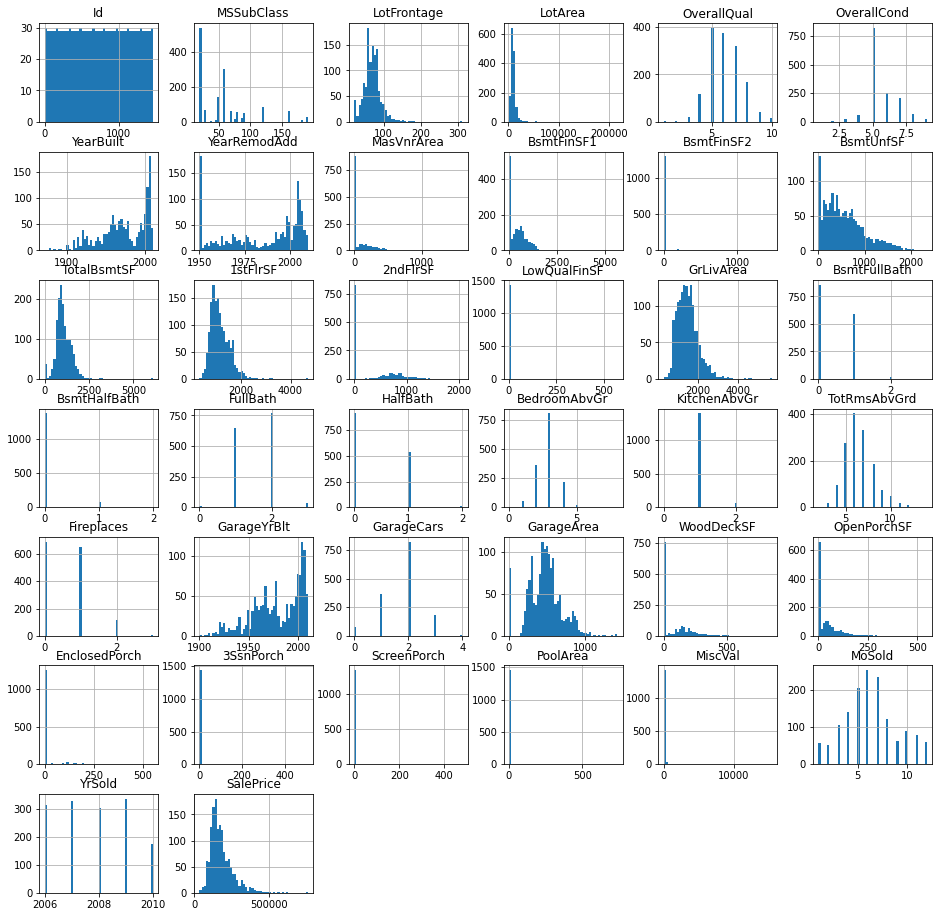

In [6]:
%matplotlib inline
train_dataset.hist(bins=50, figsize=(16,16))
plt.show()

In [7]:
def grap_col_names(dataframe,cat_th=10 , car_th = 20):
   

    cat_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["category", "object", "bool"]]
    num_but_cat = [col for col in dataframe.columns if (dataframe[col].nunique() < 10) and dataframe[col].dtypes in ["int64", "float64"]]
    cat_but_car = [col for col in dataframe.columns if
                 (dataframe[col].nunique() > 20) and str(dataframe[col].dtypes) in ["category", "object"]]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes in ["int64", "float64"]]
    num_cols = [col for col in num_cols if col not in cat_cols]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f"cat_cols: {len(cat_cols)}")
    print(f"num_cols: {len(num_cols)}")
    print(f"cat_but_car : {len(cat_but_car)}")
    print(f"num_but_cat : {len(num_but_cat)}")

    return cat_cols,num_cols,cat_but_car



cat_cols,num_cols,cat_but_car = grap_col_names(train_dataset)

Observations: 1460
Variables: 81
cat_cols: 53
num_cols: 27
cat_but_car : 1
num_but_cat : 11


         MSZoning      Ratio
RL           1151  78.835616
RM            218  14.931507
FV             65   4.452055
RH             16   1.095890
C (all)        10   0.684932
##########################################


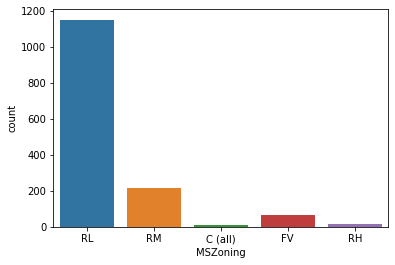

      Street      Ratio
Pave    1454  99.589041
Grvl       6   0.410959
##########################################


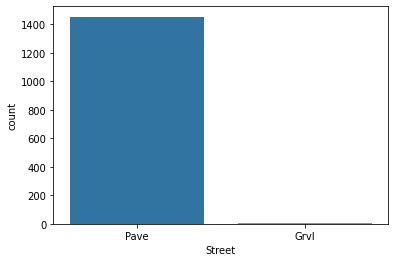

      Alley     Ratio
Grvl     50  3.424658
Pave     41  2.808219
##########################################


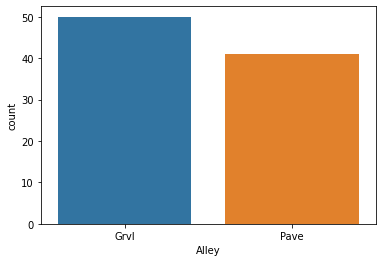

     LotShape      Ratio
Reg       925  63.356164
IR1       484  33.150685
IR2        41   2.808219
IR3        10   0.684932
##########################################


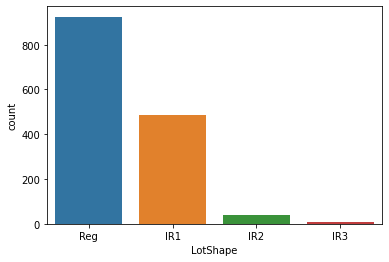

     LandContour      Ratio
Lvl         1311  89.794521
Bnk           63   4.315068
HLS           50   3.424658
Low           36   2.465753
##########################################


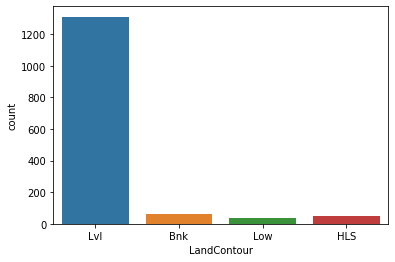

        Utilities      Ratio
AllPub       1459  99.931507
NoSeWa          1   0.068493
##########################################


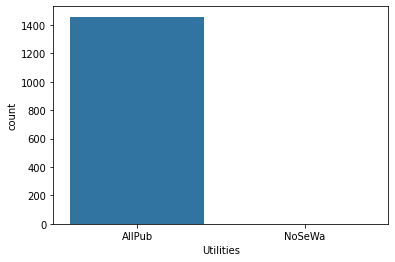

         LotConfig      Ratio
Inside        1052  72.054795
Corner         263  18.013699
CulDSac         94   6.438356
FR2             47   3.219178
FR3              4   0.273973
##########################################


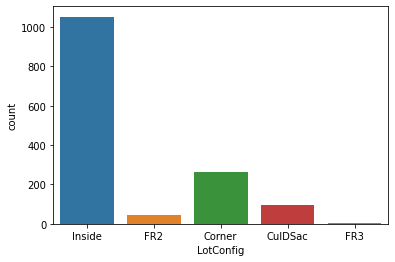

     LandSlope      Ratio
Gtl       1382  94.657534
Mod         65   4.452055
Sev         13   0.890411
##########################################


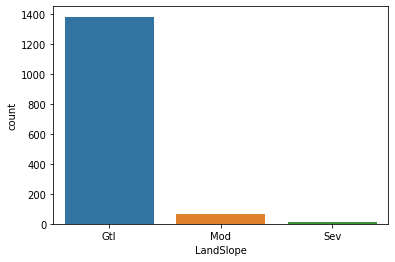

        Condition1      Ratio
Norm          1260  86.301370
Feedr           81   5.547945
Artery          48   3.287671
RRAn            26   1.780822
PosN            19   1.301370
RRAe            11   0.753425
PosA             8   0.547945
RRNn             5   0.342466
RRNe             2   0.136986
##########################################


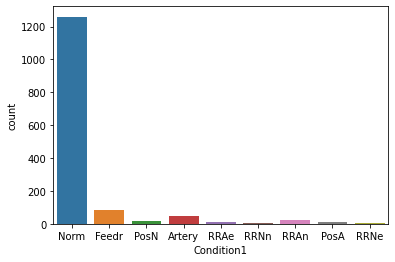

        Condition2      Ratio
Norm          1445  98.972603
Feedr            6   0.410959
Artery           2   0.136986
RRNn             2   0.136986
PosN             2   0.136986
PosA             1   0.068493
RRAn             1   0.068493
RRAe             1   0.068493
##########################################


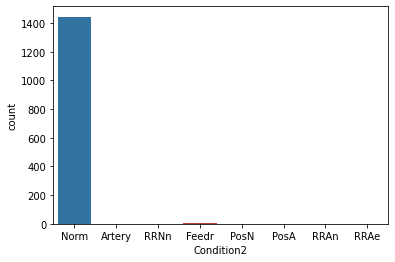

        BldgType      Ratio
1Fam        1220  83.561644
TwnhsE       114   7.808219
Duplex        52   3.561644
Twnhs         43   2.945205
2fmCon        31   2.123288
##########################################


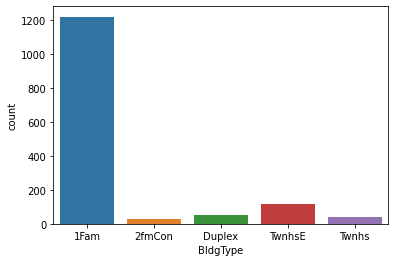

        HouseStyle      Ratio
1Story         726  49.726027
2Story         445  30.479452
1.5Fin         154  10.547945
SLvl            65   4.452055
SFoyer          37   2.534247
1.5Unf          14   0.958904
2.5Unf          11   0.753425
2.5Fin           8   0.547945
##########################################


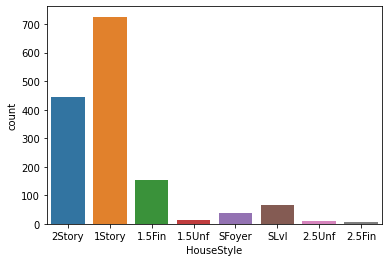

         RoofStyle      Ratio
Gable         1141  78.150685
Hip            286  19.589041
Flat            13   0.890411
Gambrel         11   0.753425
Mansard          7   0.479452
Shed             2   0.136986
##########################################


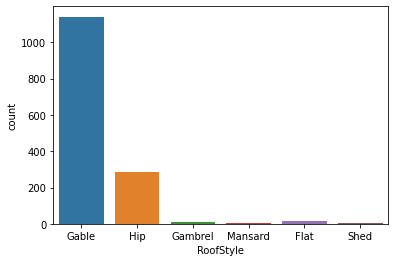

         RoofMatl      Ratio
CompShg      1434  98.219178
Tar&Grv        11   0.753425
WdShngl         6   0.410959
WdShake         5   0.342466
Metal           1   0.068493
Membran         1   0.068493
Roll            1   0.068493
ClyTile         1   0.068493
##########################################


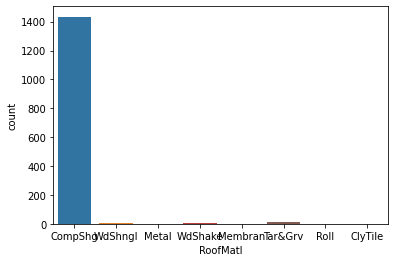

         Exterior1st      Ratio
VinylSd          515  35.273973
HdBoard          222  15.205479
MetalSd          220  15.068493
Wd Sdng          206  14.109589
Plywood          108   7.397260
CemntBd           61   4.178082
BrkFace           50   3.424658
WdShing           26   1.780822
Stucco            25   1.712329
AsbShng           20   1.369863
BrkComm            2   0.136986
Stone              2   0.136986
AsphShn            1   0.068493
ImStucc            1   0.068493
CBlock             1   0.068493
##########################################


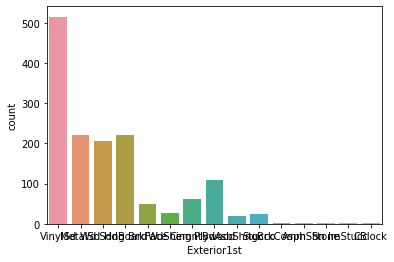

         Exterior2nd      Ratio
VinylSd          504  34.520548
MetalSd          214  14.657534
HdBoard          207  14.178082
Wd Sdng          197  13.493151
Plywood          142   9.726027
CmentBd           60   4.109589
Wd Shng           38   2.602740
Stucco            26   1.780822
BrkFace           25   1.712329
AsbShng           20   1.369863
ImStucc           10   0.684932
Brk Cmn            7   0.479452
Stone              5   0.342466
AsphShn            3   0.205479
Other              1   0.068493
CBlock             1   0.068493
##########################################


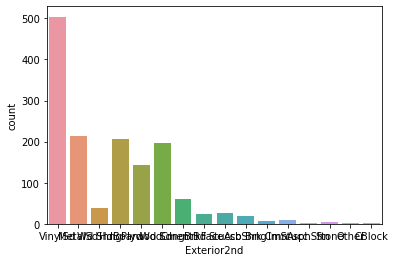

         MasVnrType      Ratio
None            864  59.178082
BrkFace         445  30.479452
Stone           128   8.767123
BrkCmn           15   1.027397
##########################################


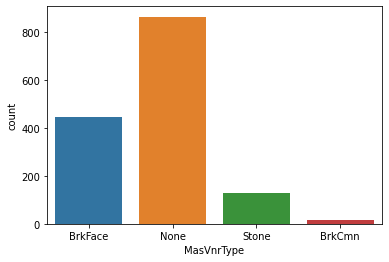

    ExterQual      Ratio
TA        906  62.054795
Gd        488  33.424658
Ex         52   3.561644
Fa         14   0.958904
##########################################


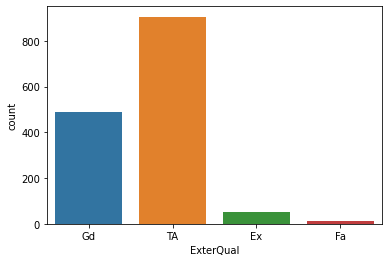

    ExterCond      Ratio
TA       1282  87.808219
Gd        146  10.000000
Fa         28   1.917808
Ex          3   0.205479
Po          1   0.068493
##########################################


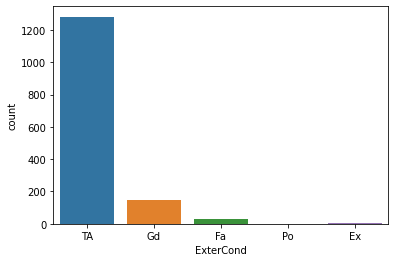

        Foundation      Ratio
PConc          647  44.315068
CBlock         634  43.424658
BrkTil         146  10.000000
Slab            24   1.643836
Stone            6   0.410959
Wood             3   0.205479
##########################################


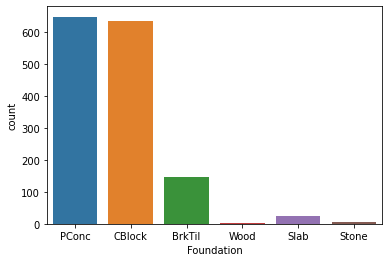

    BsmtQual      Ratio
TA       649  44.452055
Gd       618  42.328767
Ex       121   8.287671
Fa        35   2.397260
##########################################


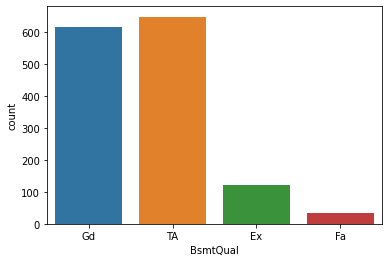

    BsmtCond      Ratio
TA      1311  89.794521
Gd        65   4.452055
Fa        45   3.082192
Po         2   0.136986
##########################################


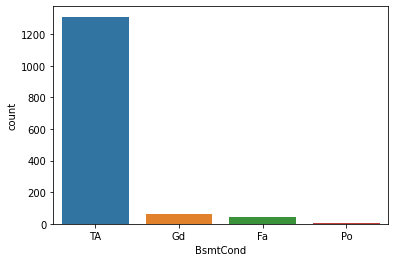

    BsmtExposure      Ratio
No           953  65.273973
Av           221  15.136986
Gd           134   9.178082
Mn           114   7.808219
##########################################


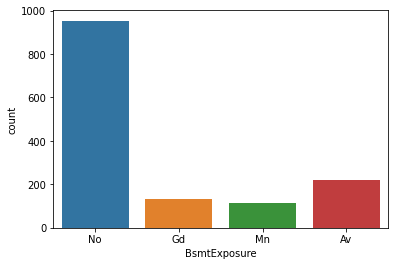

     BsmtFinType1      Ratio
Unf           430  29.452055
GLQ           418  28.630137
ALQ           220  15.068493
BLQ           148  10.136986
Rec           133   9.109589
LwQ            74   5.068493
##########################################


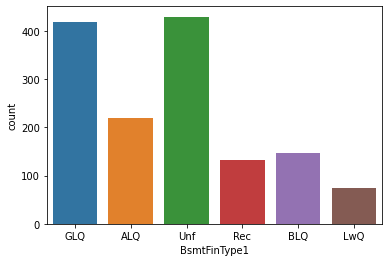

     BsmtFinType2      Ratio
Unf          1256  86.027397
Rec            54   3.698630
LwQ            46   3.150685
BLQ            33   2.260274
ALQ            19   1.301370
GLQ            14   0.958904
##########################################


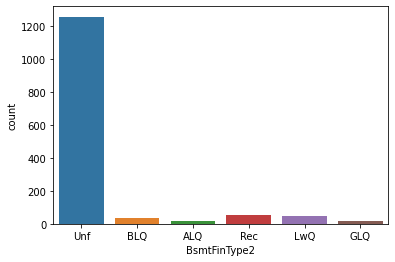

       Heating      Ratio
GasA      1428  97.808219
GasW        18   1.232877
Grav         7   0.479452
Wall         4   0.273973
OthW         2   0.136986
Floor        1   0.068493
##########################################


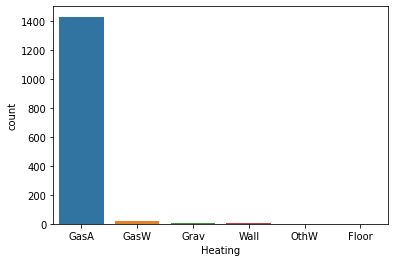

    HeatingQC      Ratio
Ex        741  50.753425
TA        428  29.315068
Gd        241  16.506849
Fa         49   3.356164
Po          1   0.068493
##########################################


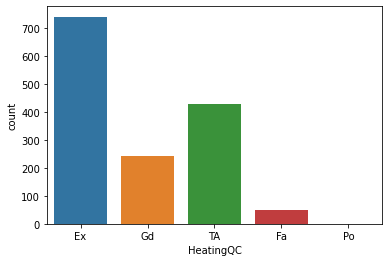

   CentralAir      Ratio
Y        1365  93.493151
N          95   6.506849
##########################################


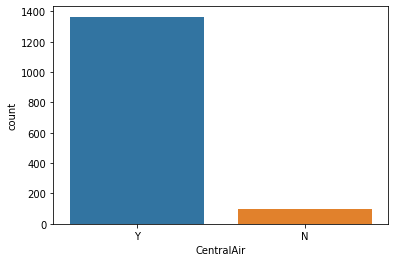

       Electrical      Ratio
SBrkr        1334  91.369863
FuseA          94   6.438356
FuseF          27   1.849315
FuseP           3   0.205479
Mix             1   0.068493
##########################################


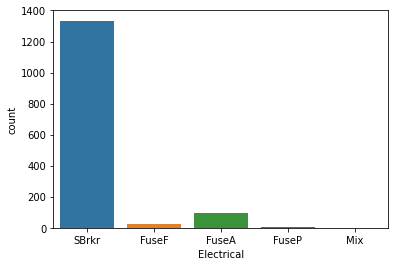

    KitchenQual      Ratio
TA          735  50.342466
Gd          586  40.136986
Ex          100   6.849315
Fa           39   2.671233
##########################################


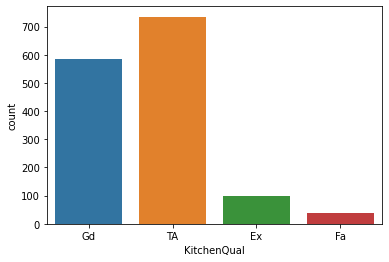

      Functional      Ratio
Typ         1360  93.150685
Min2          34   2.328767
Min1          31   2.123288
Mod           15   1.027397
Maj1          14   0.958904
Maj2           5   0.342466
Sev            1   0.068493
##########################################


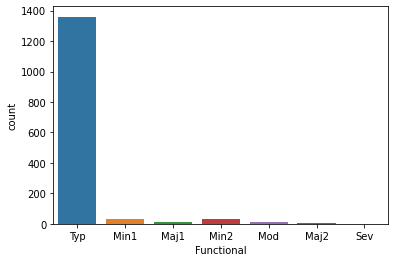

    FireplaceQu      Ratio
Gd          380  26.027397
TA          313  21.438356
Fa           33   2.260274
Ex           24   1.643836
Po           20   1.369863
##########################################


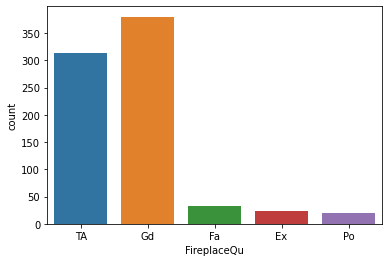

         GarageType      Ratio
Attchd          870  59.589041
Detchd          387  26.506849
BuiltIn          88   6.027397
Basment          19   1.301370
CarPort           9   0.616438
2Types            6   0.410959
##########################################


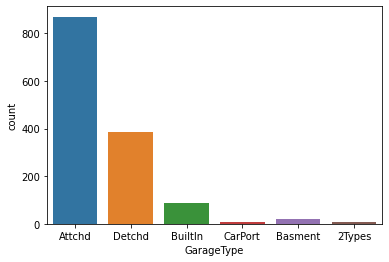

     GarageFinish      Ratio
Unf           605  41.438356
RFn           422  28.904110
Fin           352  24.109589
##########################################


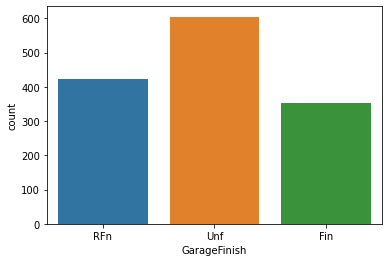

    GarageQual      Ratio
TA        1311  89.794521
Fa          48   3.287671
Gd          14   0.958904
Ex           3   0.205479
Po           3   0.205479
##########################################


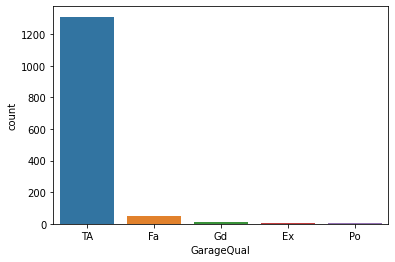

    GarageCond      Ratio
TA        1326  90.821918
Fa          35   2.397260
Gd           9   0.616438
Po           7   0.479452
Ex           2   0.136986
##########################################


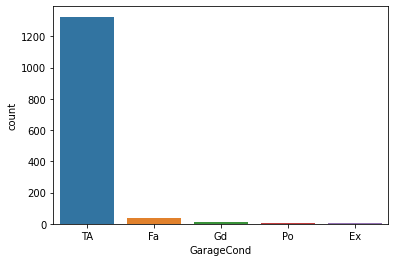

   PavedDrive      Ratio
Y        1340  91.780822
N          90   6.164384
P          30   2.054795
##########################################


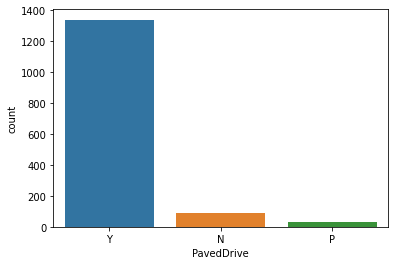

    PoolQC     Ratio
Gd       3  0.205479
Ex       2  0.136986
Fa       2  0.136986
##########################################


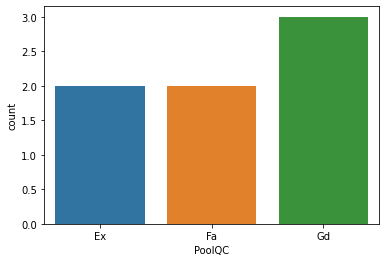

       Fence      Ratio
MnPrv    157  10.753425
GdPrv     59   4.041096
GdWo      54   3.698630
MnWw      11   0.753425
##########################################


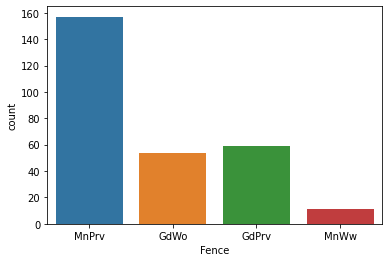

      MiscFeature     Ratio
Shed           49  3.356164
Gar2            2  0.136986
Othr            2  0.136986
TenC            1  0.068493
##########################################


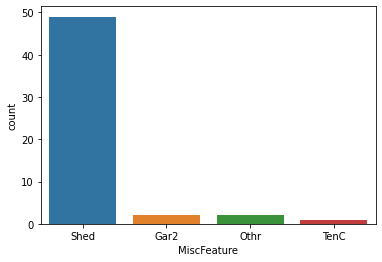

       SaleType      Ratio
WD         1267  86.780822
New         122   8.356164
COD          43   2.945205
ConLD         9   0.616438
ConLI         5   0.342466
ConLw         5   0.342466
CWD           4   0.273973
Oth           3   0.205479
Con           2   0.136986
##########################################


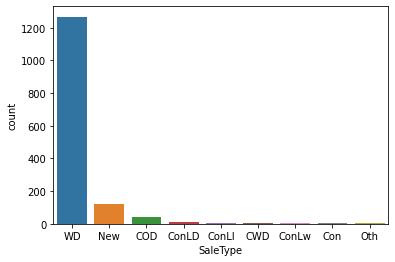

         SaleCondition      Ratio
Normal            1198  82.054795
Partial            125   8.561644
Abnorml            101   6.917808
Family              20   1.369863
Alloca              12   0.821918
AdjLand              4   0.273973
##########################################


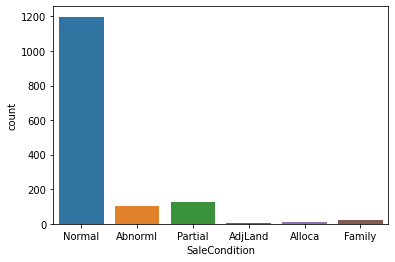

   OverallCond      Ratio
5          821  56.232877
6          252  17.260274
7          205  14.041096
8           72   4.931507
4           57   3.904110
3           25   1.712329
9           22   1.506849
2            5   0.342466
1            1   0.068493
##########################################


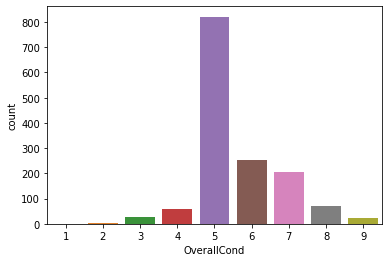

   BsmtFullBath      Ratio
0           856  58.630137
1           588  40.273973
2            15   1.027397
3             1   0.068493
##########################################


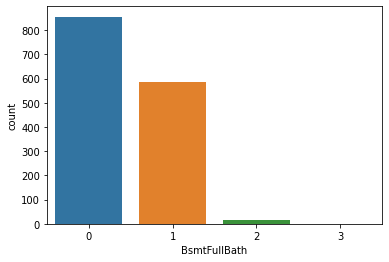

   BsmtHalfBath      Ratio
0          1378  94.383562
1            80   5.479452
2             2   0.136986
##########################################


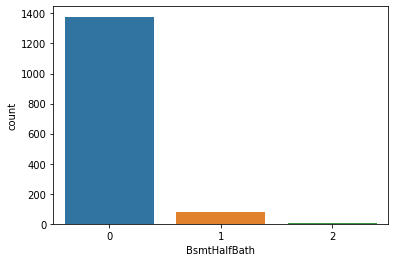

   FullBath      Ratio
2       768  52.602740
1       650  44.520548
3        33   2.260274
0         9   0.616438
##########################################


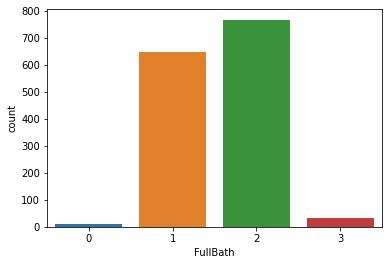

   HalfBath      Ratio
0       913  62.534247
1       535  36.643836
2        12   0.821918
##########################################


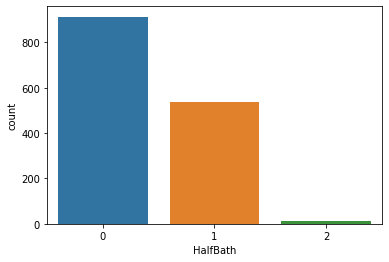

   BedroomAbvGr      Ratio
3           804  55.068493
2           358  24.520548
4           213  14.589041
1            50   3.424658
5            21   1.438356
6             7   0.479452
0             6   0.410959
8             1   0.068493
##########################################


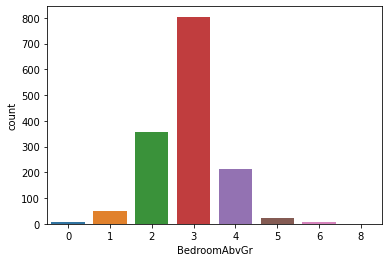

   KitchenAbvGr      Ratio
1          1392  95.342466
2            65   4.452055
3             2   0.136986
0             1   0.068493
##########################################


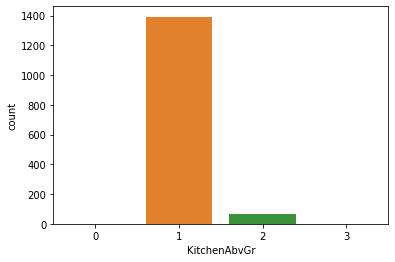

   Fireplaces      Ratio
0         690  47.260274
1         650  44.520548
2         115   7.876712
3           5   0.342466
##########################################


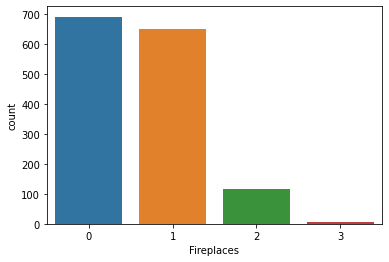

   GarageCars      Ratio
2         824  56.438356
1         369  25.273973
3         181  12.397260
0          81   5.547945
4           5   0.342466
##########################################


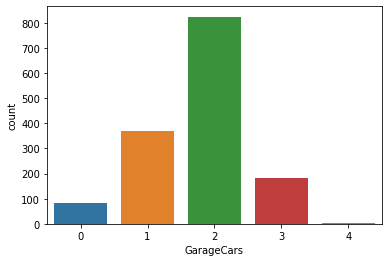

     PoolArea      Ratio
0        1453  99.520548
512         1   0.068493
648         1   0.068493
576         1   0.068493
555         1   0.068493
480         1   0.068493
519         1   0.068493
738         1   0.068493
##########################################


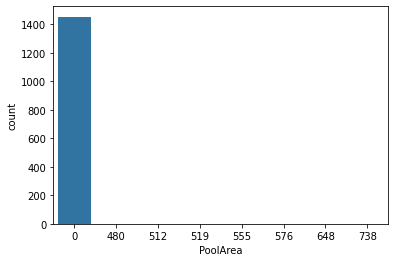

      YrSold      Ratio
2009     338  23.150685
2007     329  22.534247
2006     314  21.506849
2008     304  20.821918
2010     175  11.986301
##########################################


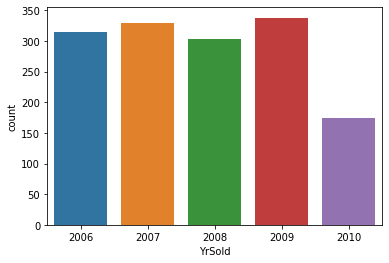

In [8]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")

    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)

for col in cat_cols:
    cat_summary(train_dataset, col, plot=True)

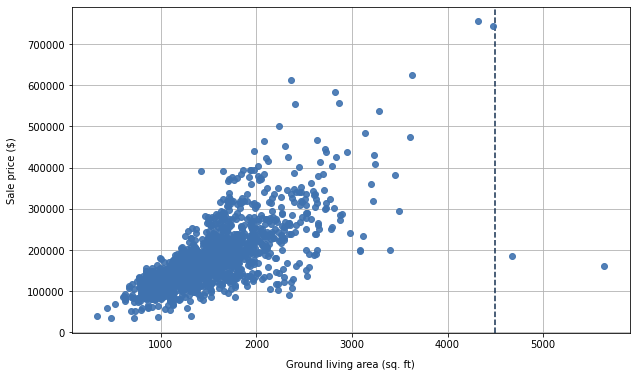

In [9]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.grid()
ax.scatter(train_dataset["GrLivArea"], train_dataset["SalePrice"], c="#3f72af", zorder=3, alpha=0.9)
ax.axvline(4500, c="#112d4e", ls="--", zorder=2)
ax.set_xlabel("Ground living area (sq. ft)", labelpad=10)
ax.set_ylabel("Sale price ($)", labelpad=10)
plt.show()

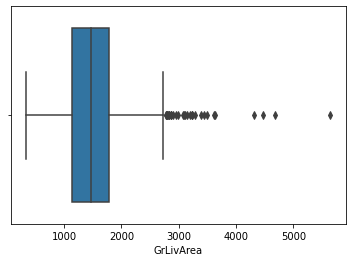

In [10]:
sns.boxplot(train_dataset.GrLivArea)
plt.show()

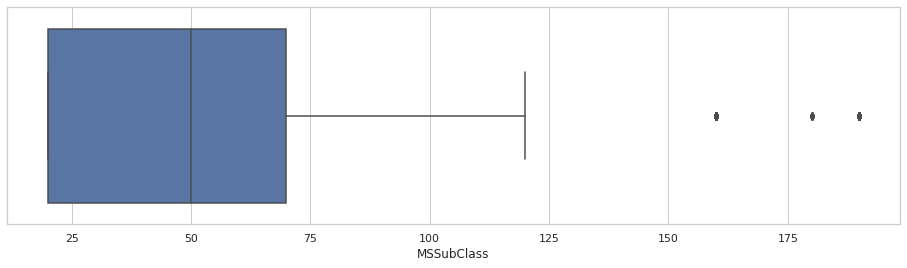

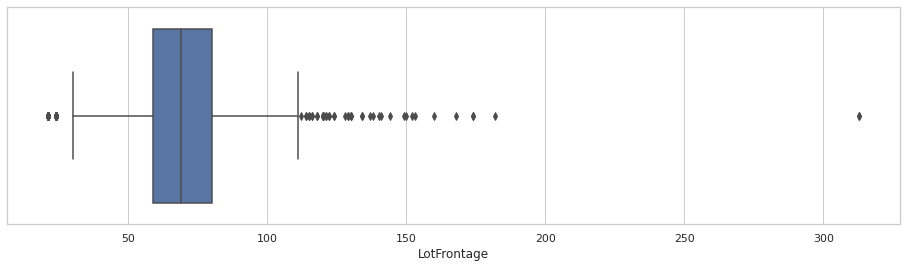

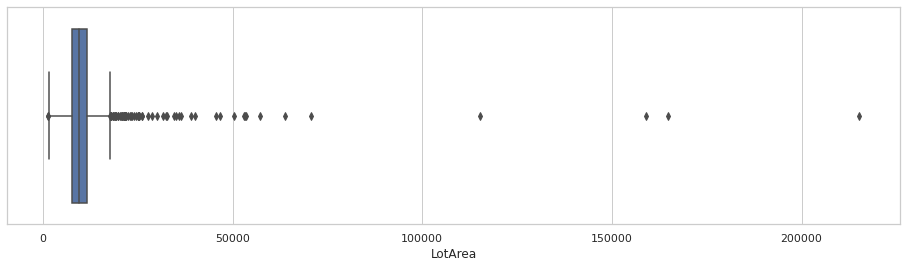

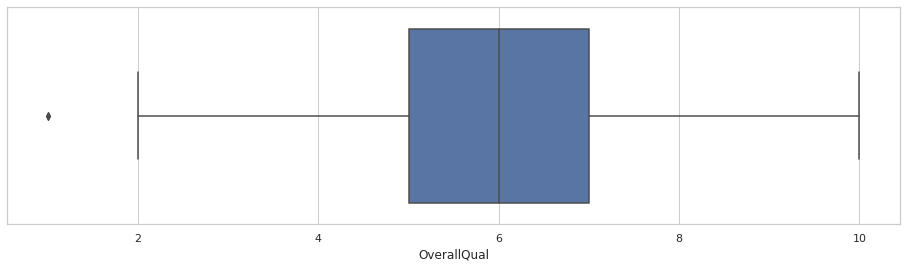

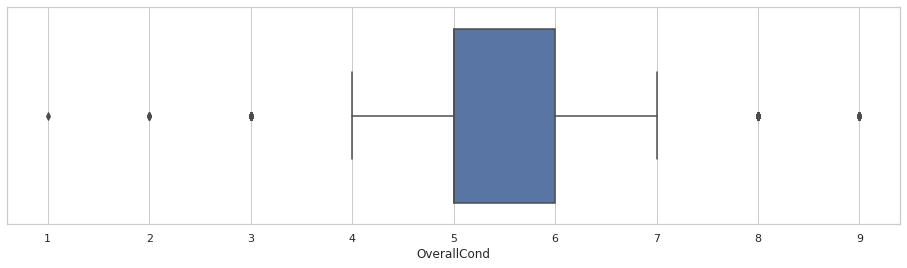

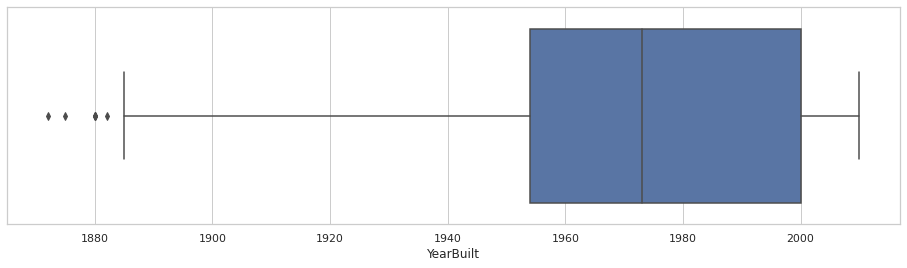

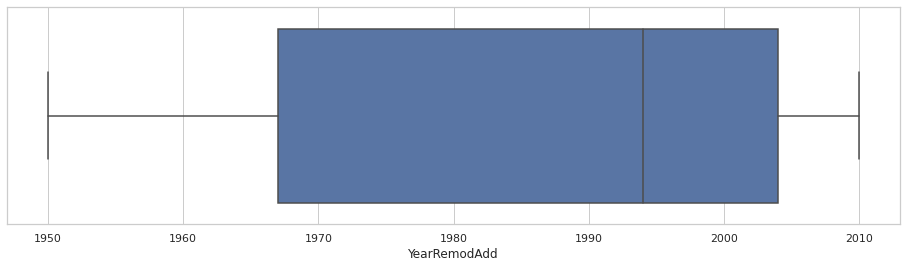

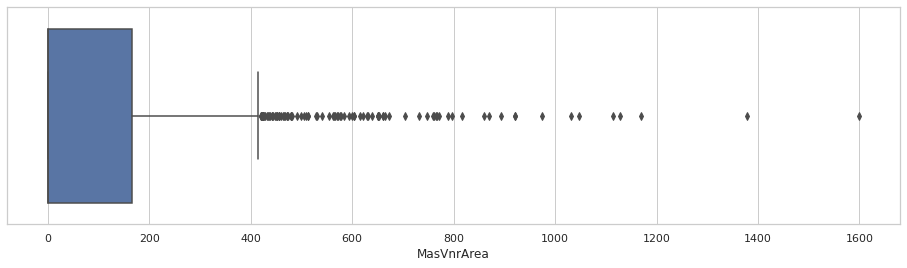

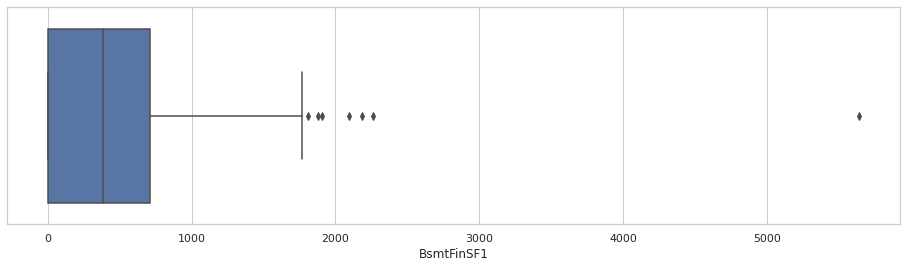

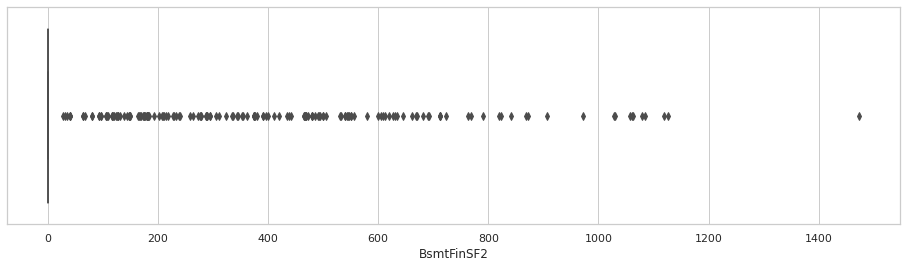

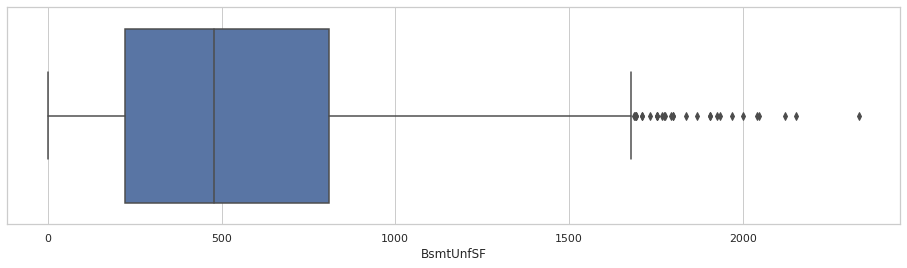

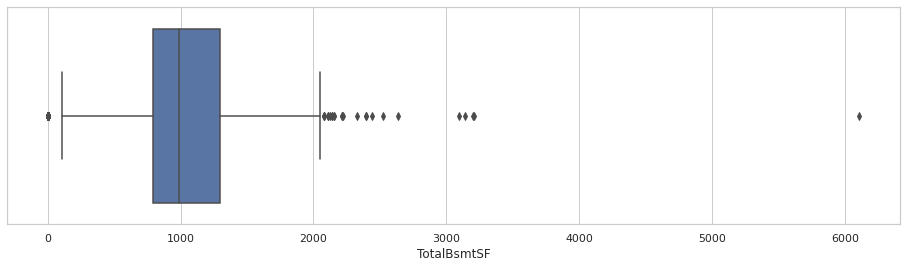

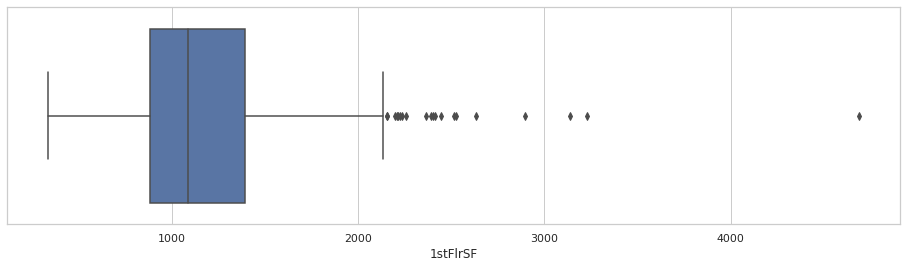

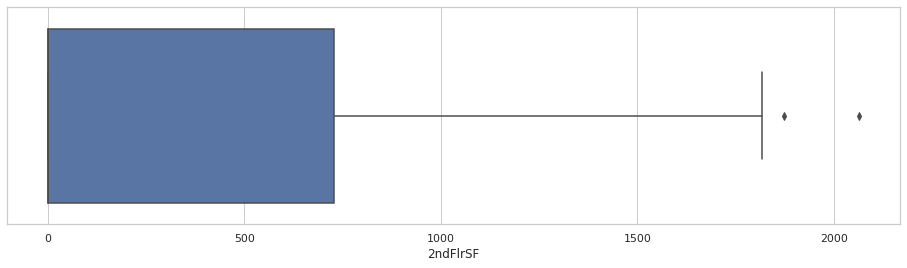

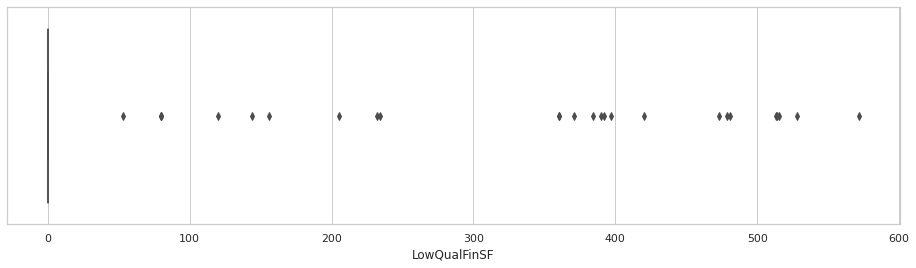

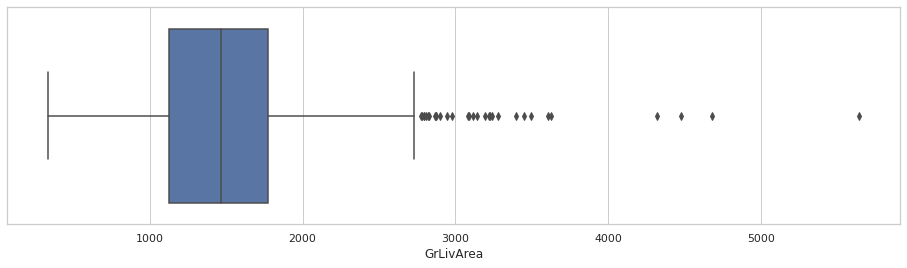

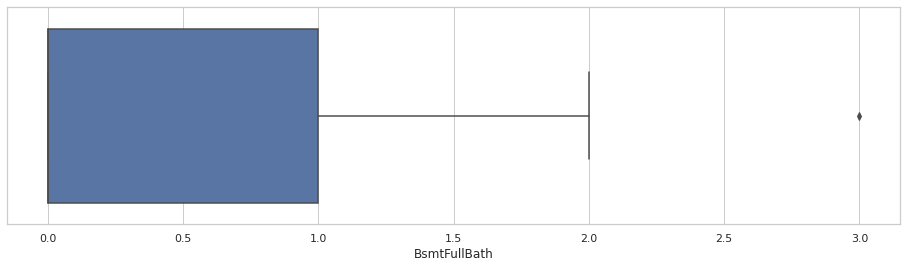

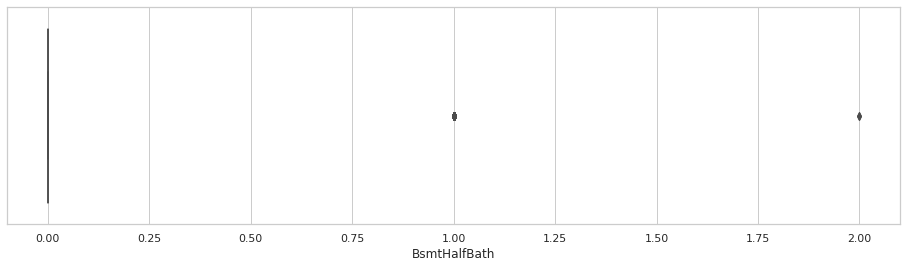

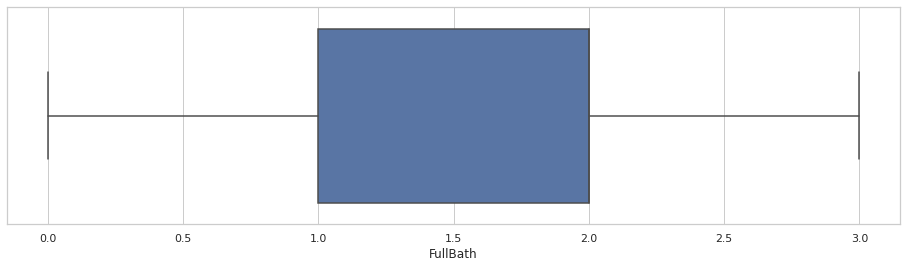

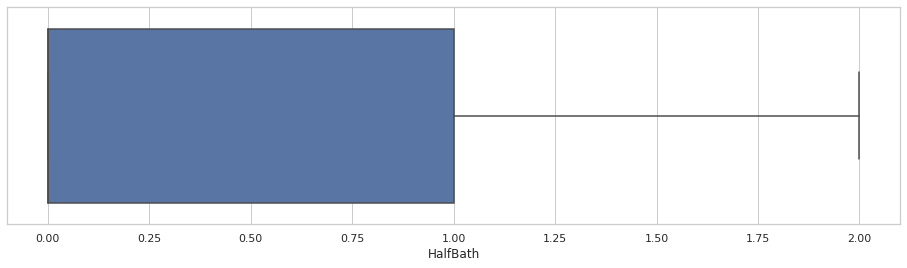

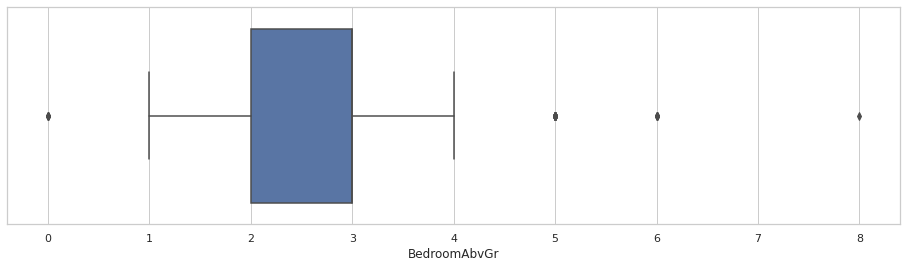

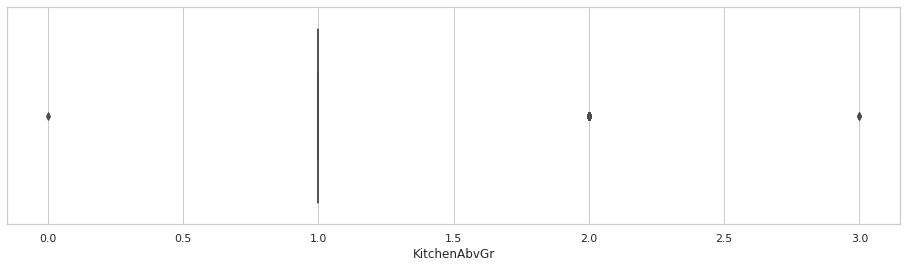

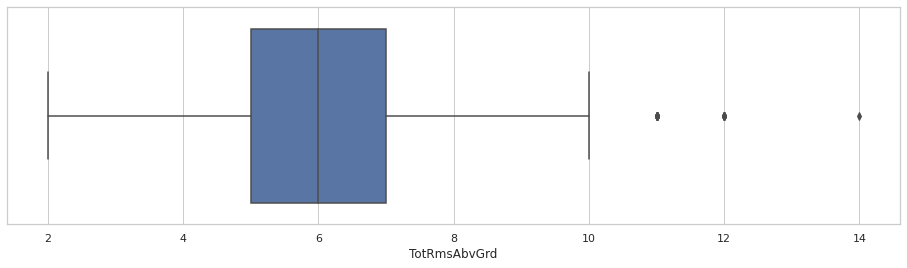

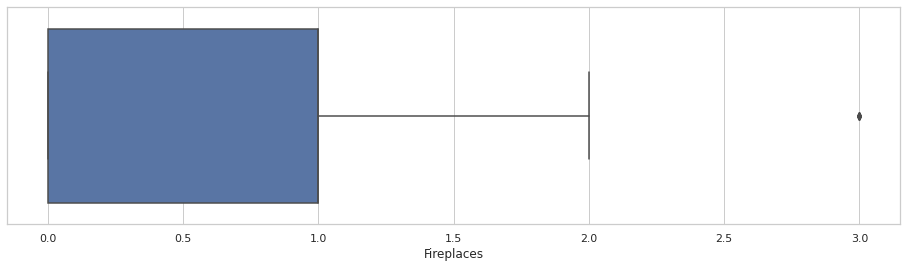

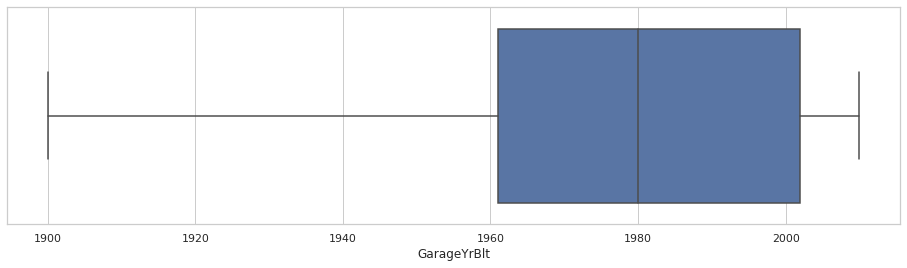

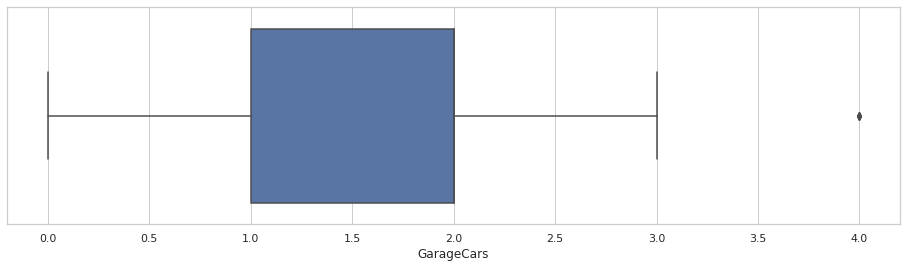

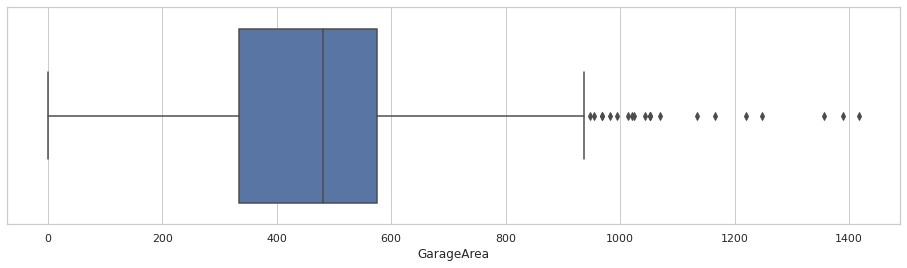

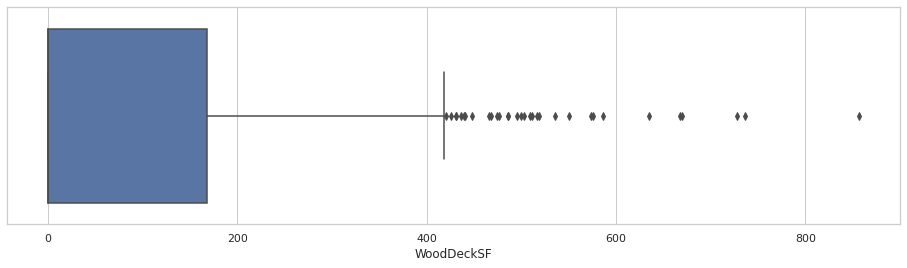

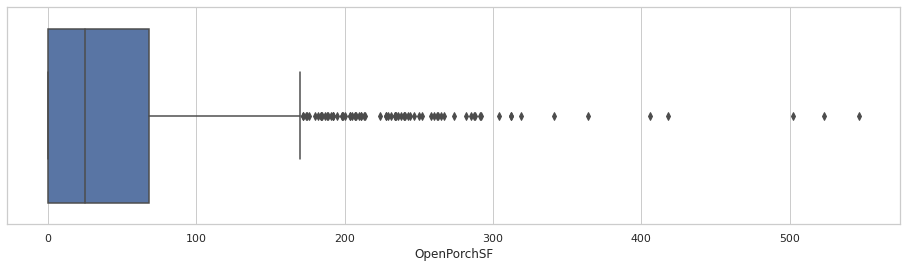

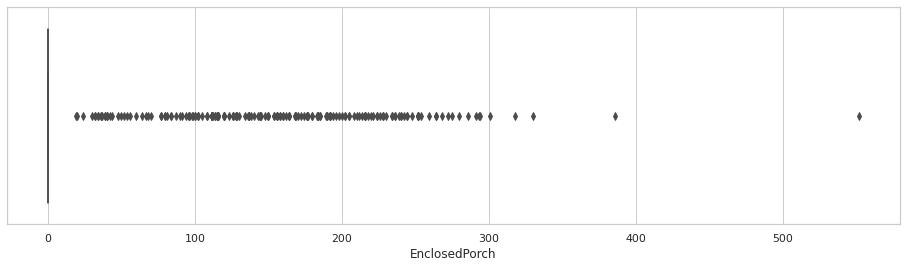

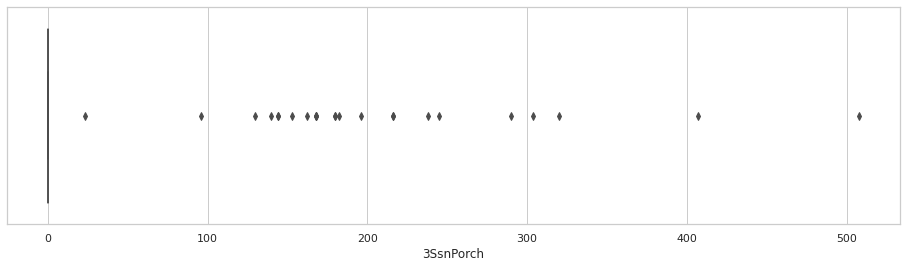

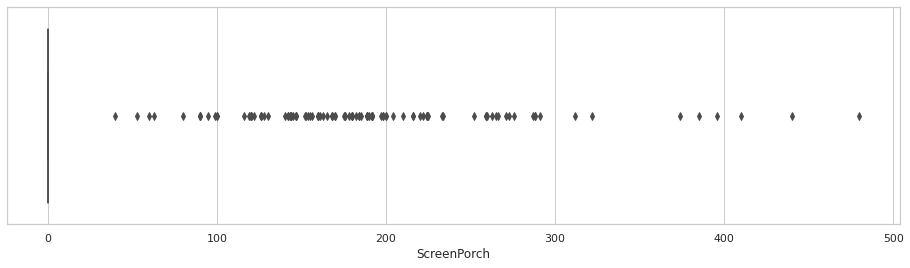

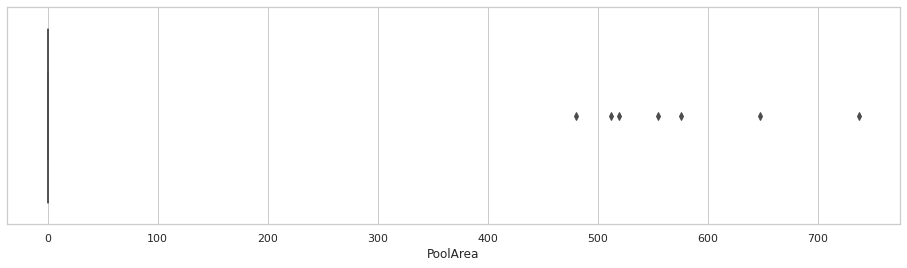

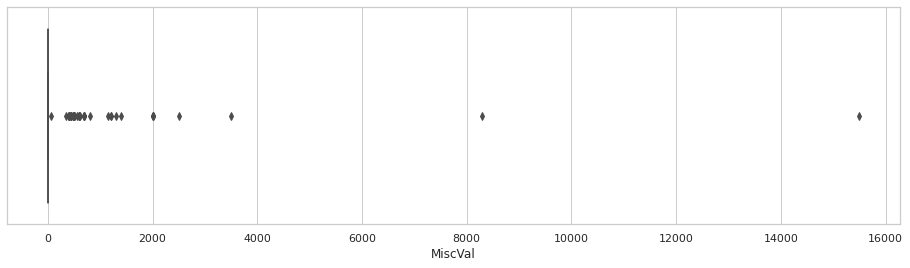

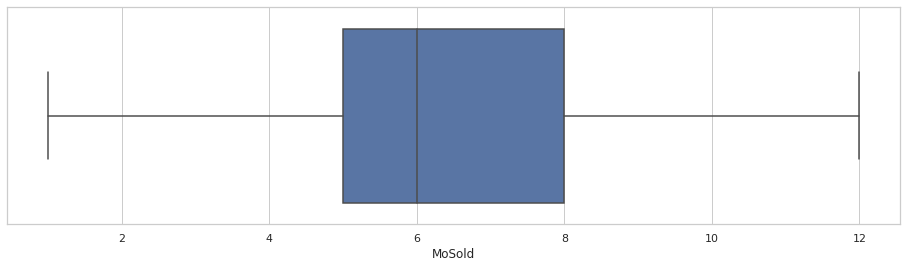

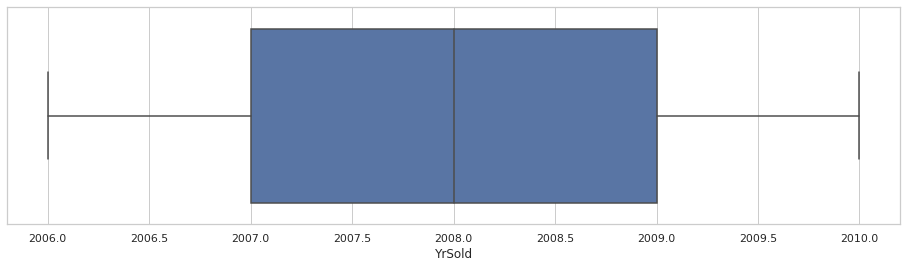

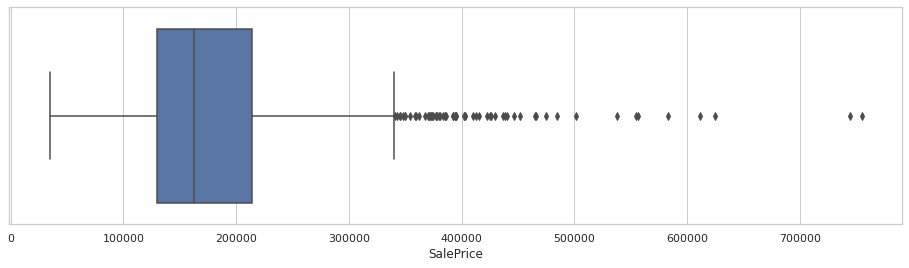

In [11]:
numerical_df = train_dataset.select_dtypes(exclude=['object'])
numerical_df = numerical_df.drop(["Id"], axis=1)
for column in numerical_df:
    plt.figure(figsize=(16, 4))
    sns.set_theme(style="whitegrid")
    sns.boxplot(numerical_df[column])

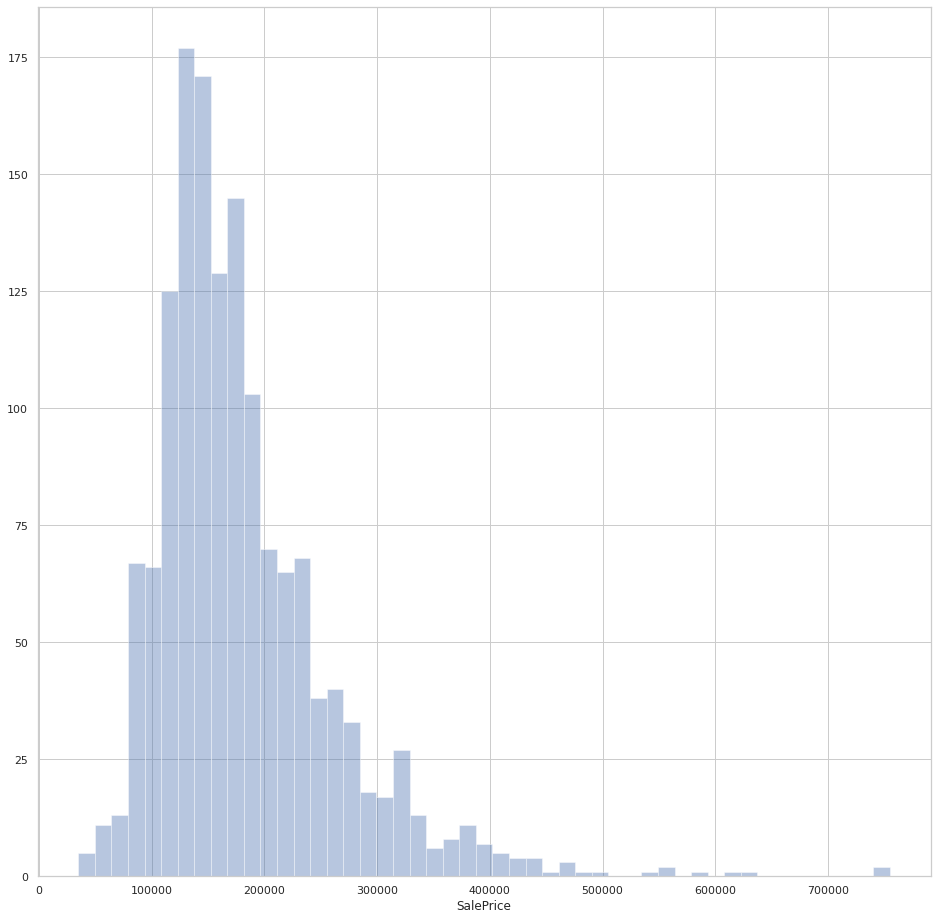

In [12]:
f, ax = plt.subplots(figsize=(16, 16))
sns.distplot(train_dataset.get("SalePrice"), kde=False)
plt.show()

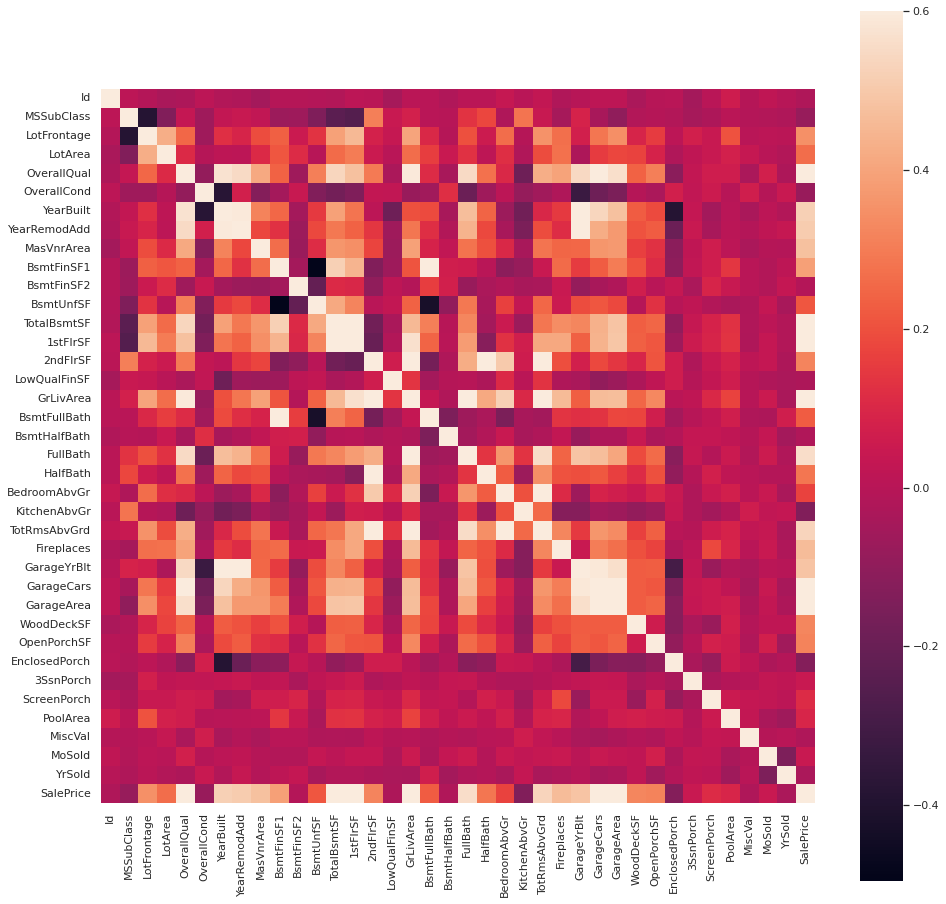

In [13]:
corrmat = train_dataset.corr()
f, ax = plt.subplots(figsize=(16, 16))
sns.heatmap(corrmat, vmax=.6, square=True)
plt.show()

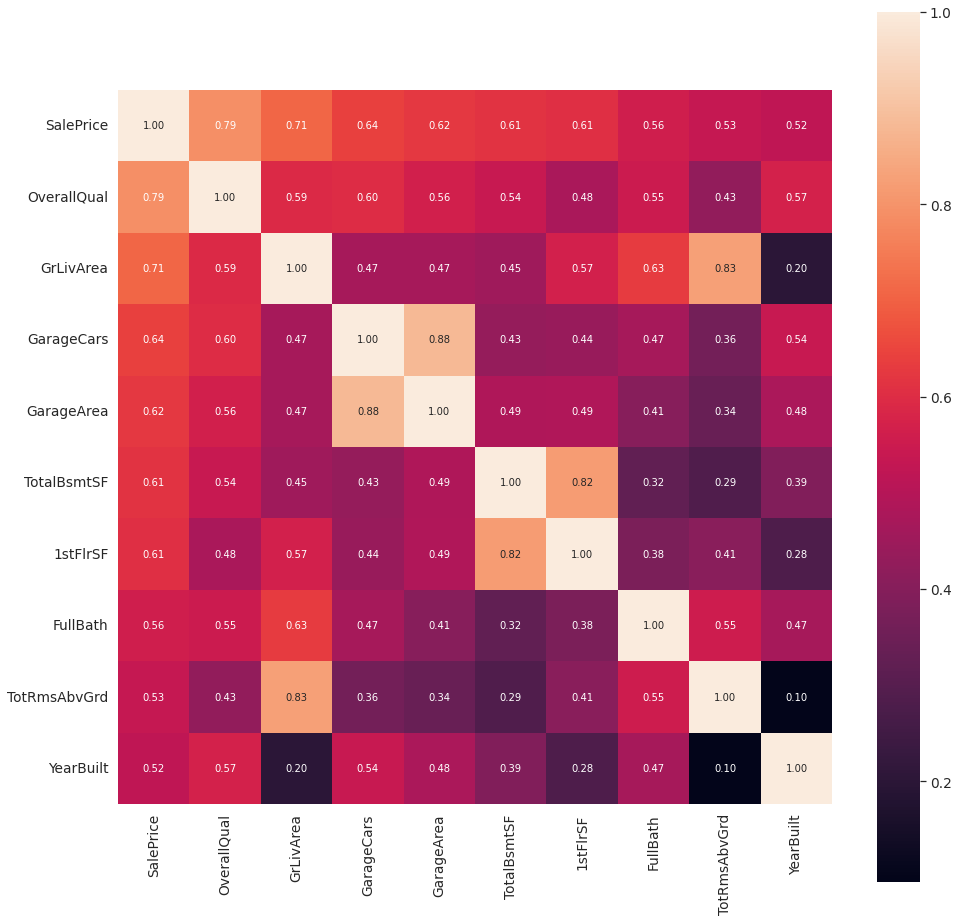

In [14]:
plt.figure(figsize=(16,16))
columns = corrmat.nlargest(10, 'SalePrice')['SalePrice'].index
correlation_matrix = np.corrcoef(train_dataset[columns].values.T)
sns.set(font_scale=1.25)
heat_map = sns.heatmap(correlation_matrix, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=columns.values, xticklabels=columns.values)
plt.show()

In [15]:
train_dataset = train_dataset[train_dataset.GrLivArea < 4500]

In [16]:
total = test_dataset.isna().sum().sort_values(ascending=False)
# concatenate this data into dataframe
missing_data = pd.concat([total], axis=1, keys=["Total"])
missing_data.head(45)

,Total
PoolQC,1456
MiscFeature,1408
Alley,1352
Fence,1169
FireplaceQu,730
LotFrontage,227
GarageYrBlt,78
GarageQual,78
GarageFinish,78
GarageCond,78


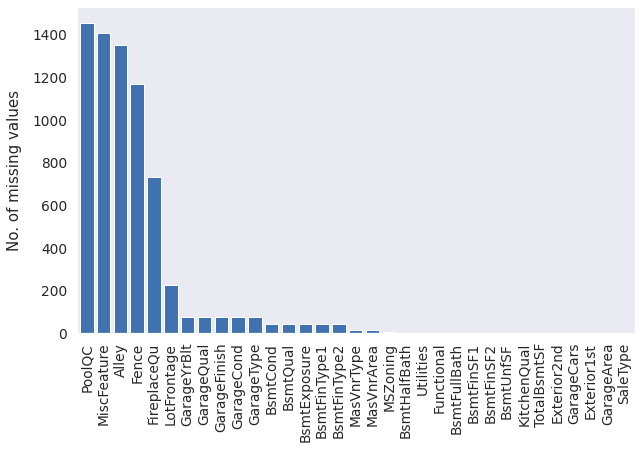

In [17]:
total = total[total > 0]
fig, ax = plt.subplots(figsize=(10, 6))
ax.grid()
ax.bar(total.index, total.values, zorder=2, color="#3f72af")
ax.set_ylabel("No. of missing values", labelpad=10)
ax.set_xlim(-0.6, len(total) - 0.4)
ax.xaxis.set_tick_params(rotation=90)
plt.show()

Random Forest Regressor

In [18]:
train_dataset = train_dataset.drop(missing_data[missing_data.Total > 0 ].index, axis=1)

In [19]:
test_dataset = test_dataset.dropna(axis=1)
test_dataset = test_dataset.drop(["Electrical"], axis=1)

In [20]:
full_dataset = pd.concat([train_dataset, test_dataset])
full_dataset = pd.get_dummies(full_dataset)

In [21]:
x = full_dataset.iloc[train_dataset.index]
x_test = full_dataset.iloc[test_dataset.index]

In [22]:
x = x.drop(["SalePrice"], axis=1)

In [23]:
y = train_dataset.SalePrice

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x, y, train_size=0.8, random_state=42)

In [25]:
x.isna().sum().sort_values(ascending=False)

Id                       0
RoofMatl_CompShg         0
HouseStyle_SLvl          0
RoofStyle_Flat           0
RoofStyle_Gable          0
                        ..
Neighborhood_Gilbert     0
Neighborhood_IDOTRR      0
Neighborhood_MeadowV     0
Neighborhood_Mitchel     0
SaleCondition_Partial    0
Length: 154, dtype: int64

In [26]:
from sklearn.linear_model import LinearRegression
from scipy.stats import zscore
regressor = LinearRegression()
regressor.fit(x_train, y_train)
regressor.score(x_val, y_val)

0.014656716430552774

In [27]:
x_test = x_test.drop(["SalePrice"], axis=1)

In [28]:
y_preds = regressor.predict(x_test)

In [29]:
import xgboost
xgb_reg = xgboost.XGBRegressor()
xgb_reg.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [30]:
y_preds = xgb_reg.predict(x_test)

In [31]:
output = pd.DataFrame({'Id': test_dataset.Id,
                      'SalePrice': y_preds})
output.to_csv('submission.csv', index=False)

In [32]:
##import